In [1]:
import numpy as np
import pandas as pd
from sodapy import Socrata
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

import locale
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=en_US.UTF-8;LC_NUMERIC=es_CO.UTF-8;LC_TIME=es_CO.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=es_CO.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_CO.UTF-8;LC_NAME=es_CO.UTF-8;LC_ADDRESS=es_CO.UTF-8;LC_TELEPHONE=es_CO.UTF-8;LC_MEASUREMENT=es_CO.UTF-8;LC_IDENTIFICATION=es_CO.UTF-8'

In [2]:
nombres_provincias = pd.read_csv("nombres_provincias_tildes.csv")
print(nombres_provincias.info())
nombres_provincias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ciudad_municipio_nom  123 non-null    object
 1   municipio_tildes      123 non-null    object
 2   provincia_tildes      123 non-null    object
 3   provincia_mayuscula   123 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB
None


,ciudad_municipio_nom,municipio_tildes,provincia_tildes,provincia_mayuscula
0,CHIQUIZA,Chíquiza,Centro,CENTRO
1,CHIVATA,Chivatá,Centro,CENTRO
2,COMBITA,Cómbita,Centro,CENTRO
3,CUCAITA,Cucaita,Centro,CENTRO
4,MOTAVITA,Motavita,Centro,CENTRO


In [3]:
# Get data for a specific Town
nombres_provincias.query("ciudad_municipio_nom=='TIBANA'")

,ciudad_municipio_nom,municipio_tildes,provincia_tildes,provincia_mayuscula
38,TIBANA,Tibaná,Márquez,MARQUEZ


['OCCIDENTE', 'CENTRO', 'SUGAMUXI', 'RICAURTE', 'MARQUEZ', 'TUNDAMA', 'NORTE', 'ORIENTE', 'GUTIERREZ', 'VALDERRAMA', 'LENGUPA', 'NEIRA', 'LA LIBERTAD']


In [5]:
# Get content of a specific provincia
nombres_provincias.query("provincia_mayuscula=='CENTRO'")

,ciudad_municipio_nom,municipio_tildes,provincia_tildes,provincia_mayuscula
0,CHIQUIZA,Chíquiza,Centro,CENTRO
1,CHIVATA,Chivatá,Centro,CENTRO
2,COMBITA,Cómbita,Centro,CENTRO
3,CUCAITA,Cucaita,Centro,CENTRO
4,MOTAVITA,Motavita,Centro,CENTRO
5,OICATA,Oicatá,Centro,CENTRO
6,SAMACA,Samacá,Centro,CENTRO
7,SIACHOQUE,Siachoque,Centro,CENTRO
8,SORA,Sora,Centro,CENTRO
9,SORACA,Soracá,Centro,CENTRO


In [24]:
# Download Data

# Code Snippet taken from
# https://dev.socrata.com/foundry/www.datos.gov.co/gt2j-8ykr
#
# Useful documentation
# https://dev.socrata.com/docs/filtering.html

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
q1 = "departamento=15"
results = client.get("gt2j-8ykr", where=q1, limit=1000000)
download_date = datetime.now() # Record date & time of data donwnload


# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

print("Data download date & time \n", download_date,"\n"*2)
results_df.info()

# Write date & Number of rows into n_reg.csv
n_rows,n_cols = results_df.shape
file_object = open('n_reg.csv', 'a')
n_entry = download_date.strftime('%d/%m/%y %H:%M') + "," + str(n_rows) + "\n"
print("\n"*2+"Writing to n_reg.csv \n--->", n_entry)
file_object.write(n_entry)
file_object.close()

Data download date & time 
 2021-06-12 08:47:14.217950 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha_reporte_web      74645 non-null  object
 1   id_de_caso             74645 non-null  object
 2   fecha_de_notificaci_n  74645 non-null  object
 3   departamento           74645 non-null  object
 4   departamento_nom       74645 non-null  object
 5   ciudad_municipio       74645 non-null  object
 6   ciudad_municipio_nom   74645 non-null  object
 7   edad                   74645 non-null  object
 8   unidad_medida          74645 non-null  object
 9   sexo                   74645 non-null  object
 10  fuente_tipo_contagio   74462 non-null  object
 11  ubicacion              74645 non-null  object
 12  estado                 74645 non-null  object
 13  recuperado             74645 non-null  object
 14  fecha_inicio

In [81]:
# Load Data
df = results_df.copy()
#del results_df

# Drop columns
drop_columns = ["departamento", 
                "departamento_nom", 
                "ciudad_municipio",
                "unidad_medida", 
                "per_etn_", 
                "nom_grupo_",
                "pais_viajo_1_cod",
                "pais_viajo_1_nom",
                "edad",
                "sexo",
                "fuente_tipo_contagio",
                "ubicacion",
                "estado",
                "tipo_recuperacion"
               ]
df = df.drop(columns=drop_columns)

# Transform dates to datetime objects using the propper format
dates = ["fecha_reporte_web", 
         "fecha_de_notificaci_n", 
         "fecha_inicio_sintomas", 
         "fecha_muerte", 
         "fecha_diagnostico", 
         "fecha_recuperado"
        ]
formated_dates = ["f_reporte_web", 
                  "f_notificacion", 
                  "f_ini_sintomas", 
                  "f_muerte", 
                  "f_diagnostico", 
                  "f_recuperacion"
                 ]
print("\n*** Formating Dates")
for i in range(len(dates)):
    print(dates[i], "\t\t--->", formated_dates[i])
    df[formated_dates[i]] = pd.to_datetime( df[dates[i]], format='%d/%m/%Y %H:%M:%S' )

df = df.drop(columns=dates)


# "Estado" column has NaN values for some cases with a valid pass-away date
# Correct those NaN with "Fallecido"
number_of_nans = np.sum(df["recuperado"]=="N/A")
print("\n*** Number of Nans in 'recuperado' column = ", number_of_nans)
if number_of_nans != 0:
    row_indexer = ~df["f_muerte"].isna() # rows with valid pass-away dates
    df.loc[ (row_indexer) , "recuperado" ] = "Fallecido" # Fix value for "Recuperado" column
    print("-->Correction of 'fallecido' value in 'recuperado' column for ", np.sum(row_indexer), "rows")
    
    number_of_nans = np.sum(df["recuperado"]=="N/A")
    print("After correction there are still ", number_of_nans, "N/A observations\n")
    print(df.loc[df["recuperado"]=="N/A",["id_de_caso","ciudad_municipio_nom","f_muerte","recuperado"]])
    
else:
    print("--> No Correction required")

# Add Provincias names
df = df.merge(nombres_provincias, on="ciudad_municipio_nom", how='left')
#df = df.drop(columns=["municipio_tildes","provincia_tildes"])
print("\n")
print(df.info())


print("\n*** Most recent reported dates\n", df.loc[:,formated_dates].max())
df = df.drop(columns=["f_reporte_web","f_notificacion"])




*** Formating Dates
fecha_reporte_web 		---> f_reporte_web
fecha_de_notificaci_n 		---> f_notificacion
fecha_inicio_sintomas 		---> f_ini_sintomas
fecha_muerte 		---> f_muerte
fecha_diagnostico 		---> f_diagnostico
fecha_recuperado 		---> f_recuperacion

*** Number of Nans in 'recuperado' column =  292
-->Correction of 'fallecido' value in 'recuperado' column for  2049 rows
After correction there are still  1 N/A observations

      id_de_caso ciudad_municipio_nom f_muerte recuperado
38920    2012548             LA UVITA      NaT        N/A


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74645 entries, 0 to 74644
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_de_caso            74645 non-null  object        
 1   ciudad_municipio_nom  74645 non-null  object        
 2   recuperado            74645 non-null  object        
 3   f_reporte_web         74645 non-null  datetime

## Resumen de casos por Provincia y por municipio

In [82]:
resumen_p = df.pivot_table(index="provincia_tildes", columns="recuperado", values="id_de_caso", aggfunc=np.count_nonzero).fillna(0)
resumen_p = resumen_p.sort_values("Activo", ascending=False)
#resumen["T"] = resumen.sum(axis=1) # Compute total observations to compare with number of "ID de caso"
resumen_p.astype(int).head(20)

# count "ID de caso" to compare with same calculation from the "Recuperado Column"
#df.groupby("Nombre municipio")["ID de caso"].agg(np.count_nonzero).sort_values(ascending=False)

recuperado,Activo,Fallecido,N/A,Recuperado
provincia_tildes,,,,
Centro,1028,432,0,23018
Tundama,661,472,0,15312
Sugamuxi,415,478,0,14843
Occidente,386,300,0,7808
Ricaurte,120,143,0,3038
Márquez,56,32,0,950
Norte,52,43,1,1332
Neira,32,40,0,1127
Lengupá,31,15,0,281


In [83]:
resumen_m = df.pivot_table(index="ciudad_municipio_nom", columns="recuperado", values="id_de_caso", aggfunc=np.count_nonzero).fillna(0)
resumen_m = resumen_m.sort_values("Activo", ascending=False)
#resumen["T"] = resumen.sum(axis=1) # Compute total observations to compare with number of "ID de caso"
print(resumen_m.astype(int).head(20))

# count "ID de caso" to compare with same calculation from the "Recuperado Column"
#df.groupby("Nombre municipio")["ID de caso"].agg(np.count_nonzero).sort_values(ascending=False)
top5 = resumen_m.sort_values("Activo", ascending=False).head(5).reset_index()["ciudad_municipio_nom"]
print("\n\nTOP 5\n",top5)

recuperado            Activo  Fallecido  N/A  Recuperado
ciudad_municipio_nom                                    
TUNJA                    914        327    0       19536
DUITAMA                  589        364    0       12432
SOGAMOSO                 341        415    0       12600
CHIQUINQUIRA             290        144    0        4029
VILLA DE LEYVA            56         33    0         642
PUERTO BOYACA             55         94    0        2566
PAIPA                     47         71    0        2138
SAMACA                    35         30    0        1150
MIRAFLORES                27         10    0         197
NOBSA                     25         13    0         932
GARAGOA                   25         36    0         868
SOATA                     24         13    0         606
MONIQUIRA                 23         64    0        1335
TUTA                      20          6    0         195
VENTAQUEMADA              15         13    0         176
TIBASOSA                  14   

In [86]:
# Tag top-5 towns as "TOP 5" in provincia column
index_top5 = df["ciudad_municipio_nom"].isin(top5)
df.loc[index_top5,"provincia_mayuscula"] = "TOP 5"
df.loc[index_top5,"provincia_tildes"] = "Municipios con más Casos"

# List of Provincias
provincias = nombres_provincias["provincia_mayuscula"].value_counts()
provincias = list(provincias.index)
provincias.append("TOP 5")
print(provincias)

provincias_tildes = nombres_provincias["provincia_tildes"].value_counts()
provincias_tildes = list(provincias_tildes.index)
provincias_tildes.append("Municipios con más Casos")
print(provincias_tildes)


['OCCIDENTE', 'CENTRO', 'SUGAMUXI', 'RICAURTE', 'MARQUEZ', 'TUNDAMA', 'NORTE', 'ORIENTE', 'GUTIERREZ', 'VALDERRAMA', 'LENGUPA', 'NEIRA', 'LA LIBERTAD', 'TOP 5']
['Occidente', 'Centro', 'Sugamuxi', 'Ricaurte', 'Márquez', 'Norte', 'Tundama', 'Oriente', 'Gutiérrez', 'Valderrama', 'Neira', 'Lengupá', 'La Libertad', 'Municipios con más Casos']


Procesando Datos de Provincia --- OCCIDENTE


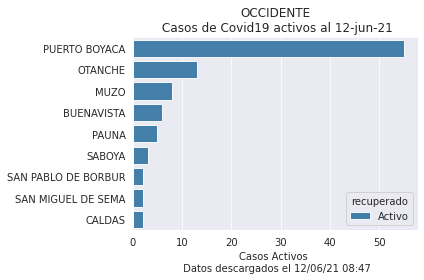

Procesando Datos de Provincia --- CENTRO


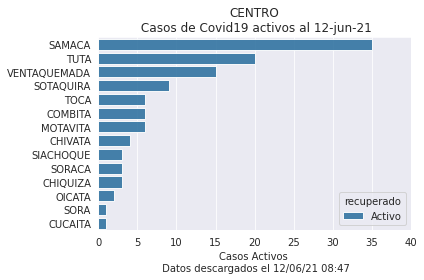

Procesando Datos de Provincia --- SUGAMUXI


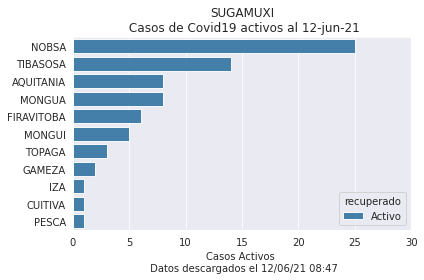

Procesando Datos de Provincia --- RICAURTE


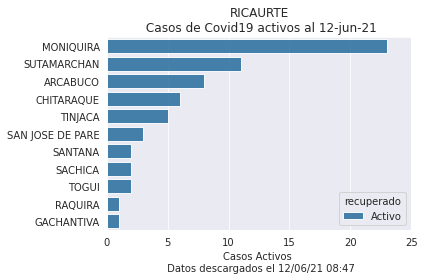

Procesando Datos de Provincia --- MARQUEZ


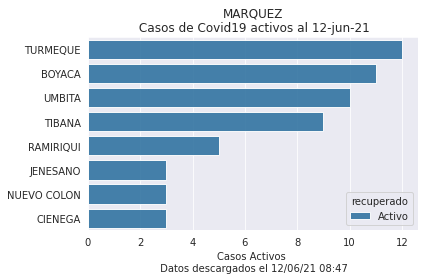

Procesando Datos de Provincia --- TUNDAMA


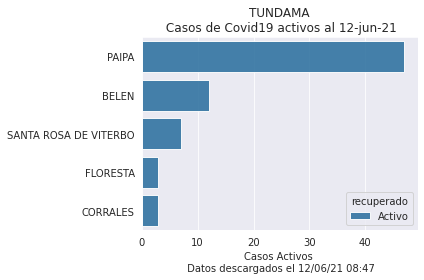

Procesando Datos de Provincia --- NORTE


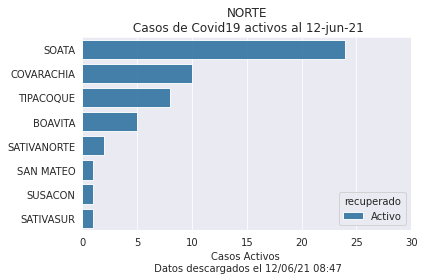

Procesando Datos de Provincia --- ORIENTE


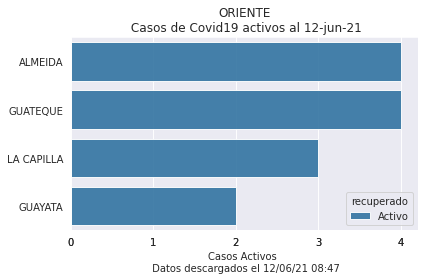

Procesando Datos de Provincia --- GUTIERREZ


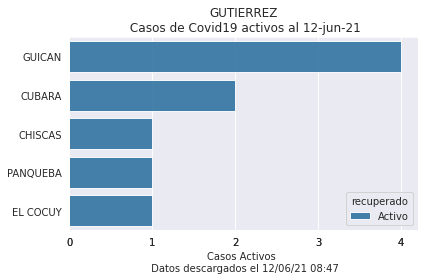

Procesando Datos de Provincia --- VALDERRAMA


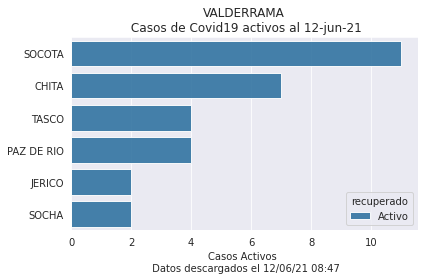

Procesando Datos de Provincia --- LENGUPA


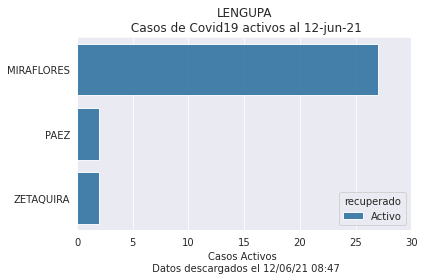

Procesando Datos de Provincia --- NEIRA


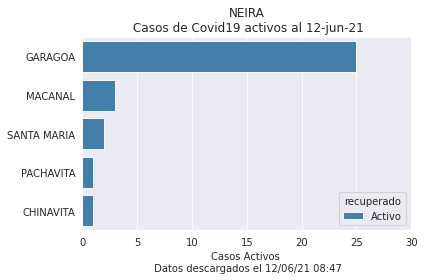

Procesando Datos de Provincia --- LA LIBERTAD


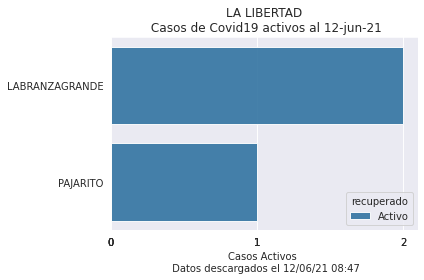

Procesando Datos de Provincia --- TOP 5


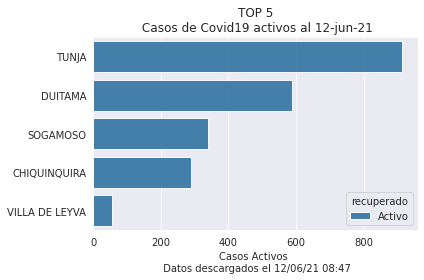

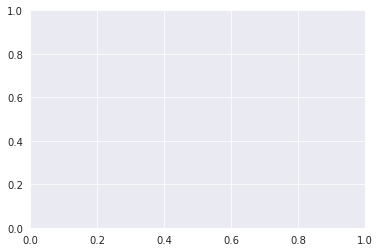

In [54]:
sns.set_style("darkgrid")

for provincia in provincias:
    print("Procesando Datos de Provincia ---", provincia)
    
    
    # Subset data
    #q1 = "recuperado=='Activo' or recuperado=='Fallecido'"
    q2 = "recuperado=='Activo'"
    df_subset = df.query(q2)
    df_subset = df_subset[df_subset.provincia_mayuscula==provincia]
    order_list = df_subset["ciudad_municipio_nom"].value_counts().index

    #Plot data
    g = sns.countplot(data=df_subset,
                 y="ciudad_municipio_nom", 
                       hue="recuperado",
                       alpha=0.9,
                      order = order_list)

    #for p in ax.patches:
            #ax.annotate('{:f}'.format(p.get_height()), (p.get_x(), p.get_height()))
            #ax.annotate('{:d}'.format(p.get_width()), (p.get_width(),p.get_y()+0.5))

    # Miscellaneous
    g.set(xlabel= "Casos Activos \n Datos descargados el " + download_date.strftime('%d/%m/%y %H:%M'),
          ylabel="",
          title= provincia + "\n Casos de Covid19 activos al " + download_date.strftime('%d-%b-%y'))
          #yticklabels=p_names_to_show)
    #plt.ylabel("")
    #plt.legend()
    #g.set_yticklabels(p_names_to_show)
    #plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # Make Sure x_ticks are ints
    old_ticks = g.get_xticks()
    floats_in_ticks = np.any(np.mod(old_ticks,2)!=0)
    if floats_in_ticks:
        new_ticks = old_ticks.astype(int)
        g.set_xticks(new_ticks)
    
    plt.tight_layout() # Make matplotlib save the whole figure content -> dont cut anything
    plt.savefig(provincia+'.png')
    plt.show()
    plt.cla()

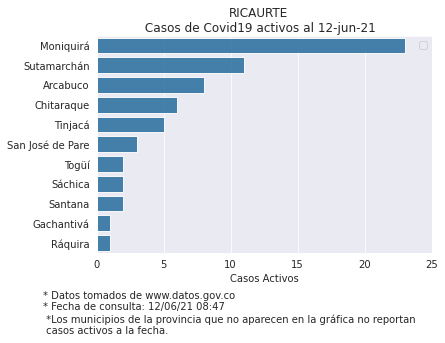

In [168]:
sns.set_style("darkgrid")

# Extract info from selected provincia
provincia = "RICAURTE"

# Subset data
q1 = "recuperado=='Activo' or recuperado=='Fallecido'"
q2 = "recuperado=='Activo'"
df_subset = df.query(q2)
df_subset = df_subset[df_subset.provincia_mayuscula==provincia]
order_list = df_subset["municipio_tildes"].value_counts().index

#Plot data
g = sns.countplot(data=df_subset,
             y="municipio_tildes", 
                   hue="recuperado",
                   alpha=0.9,
                  order = order_list)

#for p in g.patches:
        #g.annotate('{:d}'.format(p.get_width()), (p.get_width()+0.3,p.get_y()+0.5))

x_label =  "Casos Activos" 

title = provincia + "\n Casos de Covid19 activos al " + download_date.strftime('%d-%b-%y')
# Miscellaneous
g.set(xlabel= x_label,
      ylabel="")
      #title=title)
plt.suptitle(title)
plt.legend("")
#g.set_yticklabels(p_names_to_show)

# Make Sure x_ticks are ints
old_ticks = g.get_xticks()
floats_in_ticks = np.any(np.mod(old_ticks,2)!=0)
if floats_in_ticks:
    new_ticks = old_ticks.astype(int)
    g.set_xticks(new_ticks)

disclaimer = "* Datos tomados de www.datos.gov.co \n* Fecha de consulta: " +\
        download_date.strftime('%d/%m/%y %H:%M') +\
        "\n *Los municipios de la provincia que no aparecen en la gráfica no reportan\n casos activos a la fecha."
plt.figtext(0, -0.15, disclaimer, ha="left", fontsize=10, wrap=True)

#plt.autoscale()
#plt.tight_layout() # Make matplotlib save the whole figure content -> dont cut anything
plt.savefig('p.png')

In [ ]:
g.fi

In [120]:
plt.tight_layout?

In [64]:
df_subset["ciudad_municipio_nom"].value_counts()

TURMEQUE       12
BOYACA         11
UMBITA         10
TIBANA          9
RAMIRIQUI       5
JENESANO        3
NUEVO COLON     3
CIENEGA         3
Name: ciudad_municipio_nom, dtype: int64

In [69]:
nombres_provincias.query("provincia_mayuscula=='MARQUEZ'")

,ciudad_municipio_nom,municipio_tildes,provincia_tildes,provincia_mayuscula
32,BOYACA,Boyacá,Márquez,MARQUEZ
33,CIENEGA,Ciénega,Márquez,MARQUEZ
34,JENESANO,Jenesano,Márquez,MARQUEZ
35,NUEVO COLON,Nuevo Colón,Márquez,MARQUEZ
36,RAMIRIQUI,Ramiriquí,Márquez,MARQUEZ
37,RONDON,Rondón,Márquez,MARQUEZ
38,TIBANA,Tibaná,Márquez,MARQUEZ
39,TURMEQUE,Turmequé,Márquez,MARQUEZ
40,UMBITA,Úmbita,Márquez,MARQUEZ
41,VIRACACHA,Viracachá,Márquez,MARQUEZ


In [75]:
df[df["ciudad_municipio_nom"]=="VIRACACHA"].recuperado.value_counts()

Recuperado    26
Name: recuperado, dtype: int64

In [57]:
yy = g.get_yticklabels()
print(type(yy), len(yy), type(yy[2]), yy, sep="\n"*2)

<class 'list'>

8

<class 'matplotlib.text.Text'>

[Text(0, 0, 'TURMEQUE'), Text(0, 1, 'BOYACA'), Text(0, 2, 'UMBITA'), Text(0, 3, 'TIBANA'), Text(0, 4, 'RAMIRIQUI'), Text(0, 5, 'JENESANO'), Text(0, 6, 'NUEVO COLON'), Text(0, 7, 'CIENEGA')]


In [ ]:
# Leer ticks que se usan
# Construir lista
# Ste yticklabels

In [74]:
yy[2].get_text()

'RAMIRIQUI'

In [61]:
yyy = g.get_yticks()
print(yyy)

[0 1 2 3 4 5 6 7]


Text(0, 5, 'asd')


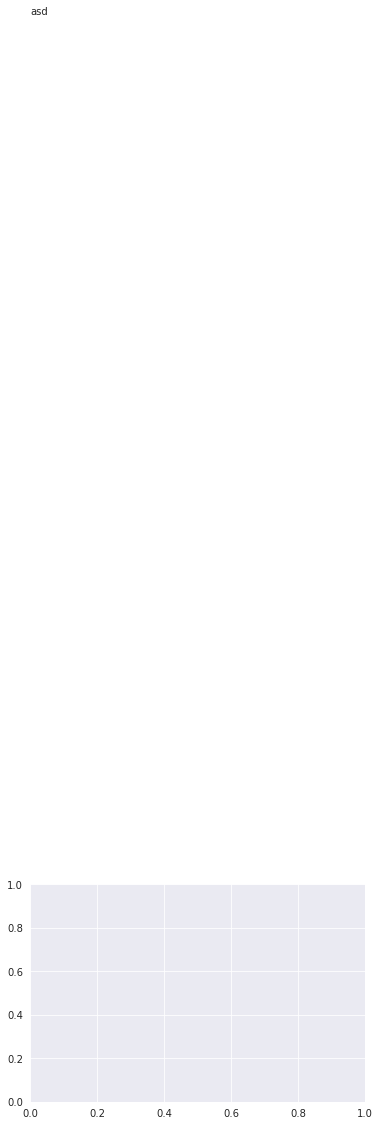

In [62]:
a = plt.text(0,5,"asd")
print(a)

# Time Series

In [9]:
# Generate dummi variables to easily create the time series
d_recuperado = pd.get_dummies(df["recuperado"], prefix='d')
d_df = pd.concat([df, d_recuperado], axis=1) 
d_df = d_df.drop(columns=["recuperado","d_Activo"])
d_df.head()

,id_de_caso,ciudad_municipio_nom,f_ini_sintomas,f_muerte,f_diagnostico,f_recuperacion,d_Fallecido,d_N/A,d_Recuperado
0,445,SANTANA,2020-03-13,NaT,2020-03-25,2020-04-06,0,0,1
1,489,TUNJA,2020-03-22,NaT,2020-03-26,2020-04-06,0,0,1
2,690,OICATA,2020-03-25,NaT,2020-03-29,2020-04-11,0,0,1
3,703,SANTANA,2020-03-18,NaT,2020-03-30,2020-04-13,0,0,1
4,864,TUNJA,2020-03-22,2020-04-04,2020-03-31,NaT,1,0,0


In [10]:
# Create time series for active, recovered, passaway
# Each time series requires to be done independently

# Create acumulate time series using pivot tables
new_cases = d_df.pivot_table(index="f_ini_sintomas", 
                                  values="id_de_caso", 
                                  columns="ciudad_municipio_nom", 
                                  aggfunc=np.count_nonzero)
cum_new_cases = new_cases.sort_index(ascending=True).cumsum() 

new_rec = d_df.pivot_table(index="f_recuperacion",
                                values="d_Recuperado",
                                columns="ciudad_municipio_nom",
                                aggfunc=np.count_nonzero)
cum_rec = new_rec.sort_index(ascending=True).cumsum()

new_pa = d_df.pivot_table(index="f_muerte",
                              values="d_Fallecido",
                              columns="ciudad_municipio_nom",
                              aggfunc=np.count_nonzero)
cum_pa = new_pa.sort_index(ascending=True).cumsum()

In [11]:
# Resample all 3 time series in the same index so they can be summed
d_min = min([d_df.f_ini_sintomas.min(), d_df.f_recuperacion.min()])
d_max = max([d_df.f_ini_sintomas.max(), d_df.f_recuperacion.max()])
t_index = pd.date_range(start=d_min, end=d_max, freq='D')
print(d_min, d_max, sep="\n")

# Use pad() to fill values to the front and fillna(0) to fill NaN with 0
r_cum_new_cases = cum_new_cases.reindex(t_index).pad().fillna(0)
r_cum_rec = cum_rec.reindex(t_index).pad().fillna(0)
r_cum_pa = cum_pa.reindex(t_index).pad().fillna(0)

# Compute active cases: cumulative new cases - cummulative recovered - cummulative p.a.
active_cases = r_cum_new_cases - r_cum_rec - r_cum_pa

2020-03-13 00:00:00
2021-06-10 00:00:00


## Provincia Marquez

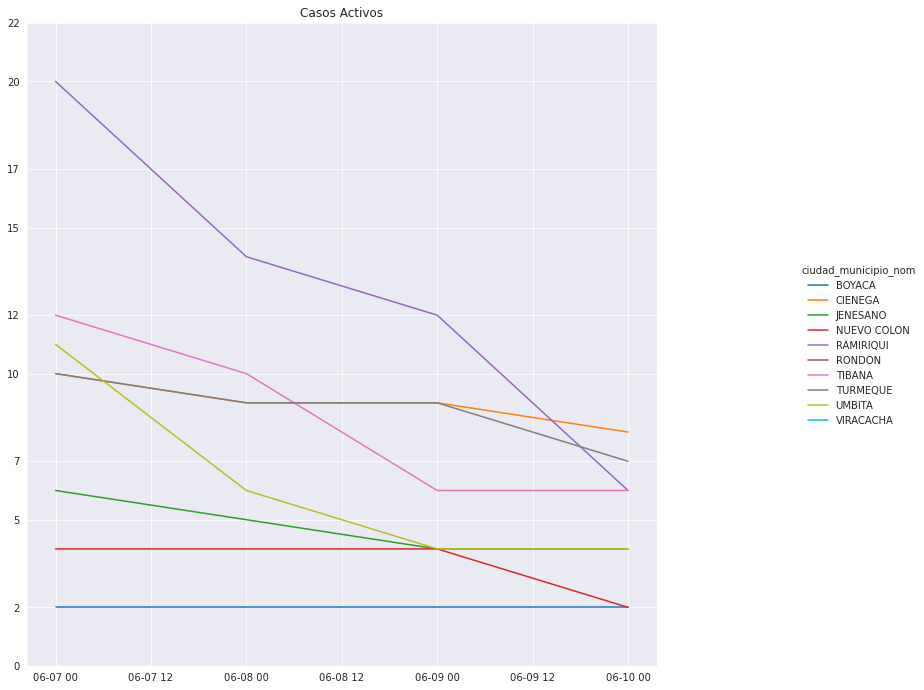

In [35]:
sns.set_style("darkgrid")
towns = Marquez["towns"]
g = sns.relplot(data=active_cases.loc[active_cases.index > "2021-06-06",towns],
           kind='line',
           dashes=False)
g.fig.set_size_inches(14,10)
#plt.grid()
plt.title("Casos Activos")
plt.grid('both')
old_ticks = g.ax.get_yticks()
new_ticks = old_ticks.astype(int)
g.ax.set_yticks(new_ticks)

In [33]:

print(old_ticks, new_ticks, sep="\n\n")

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5]

[ 0  2  5  7 10 12 15 17 20 22]


# To Fix
* Last item of time series and reported active cases do not match by a small count
* Add 'tildes' to towns names
* Change the towns lists to be taken from provincia_nombres_tildes df
* Make one gaphic for each provincia and export